<a href="https://colab.research.google.com/github/Fatimakhanim/Deep-Learning-Projects/blob/main/04_transfer_learning_feature_extraction_part2_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py

--2024-07-29 16:39:08--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-07-29 16:39:08 (19.3 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback , plot_loss_curves,unzip_data , walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-07-29 16:39:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   310MB/s    in 0.5s    

2024-07-29 16:39:09 (310 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
unzip_data("/content/10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("/content/10_food_classes_10_percent")

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_10_

In [ ]:
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf

IMG_SIZE = (224,224)
BATCH_SIZE = 32


train_data_10_precent = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                                    image_size = IMG_SIZE,
                                                                    batch_size = BATCH_SIZE,
                                                                    label_mode = 'categorical')


test_data_10_precent = tf.keras.utils.image_dataset_from_directory( test_dir,
                                                                    image_size = IMG_SIZE,
                                                                    batch_size = BATCH_SIZE,
                                                                    label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_precent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for image,labels in train_data_10_precent.take(1):
  print(image,labels)

tf.Tensor(
[[[[161.64285   177.64285   167.64285  ]
   [163.57143   179.57143   169.57143  ]
   [165.64285   181.64285   171.64285  ]
   ...
   [100.29079   103.29079    84.29079  ]
   [ 97.        100.         81.       ]
   [ 97.35714   100.35714    81.35714  ]]

  [[161.73979   177.73979   167.73979  ]
   [163.0051    179.0051    169.0051   ]
   [165.08673   181.08673   171.08673  ]
   ...
   [101.44383   104.44383    85.44383  ]
   [ 97.07144   100.07144    81.07144  ]
   [ 99.38269   102.38269    83.38269  ]]

  [[163.78572   179.78572   169.78572  ]
   [164.        180.        170.       ]
   [166.21428   182.21428   172.21428  ]
   ...
   [101.64279   104.64279    85.64279  ]
   [ 97.07144   100.07144    81.07144  ]
   [100.21943   103.21943    84.21943  ]]

  ...

  [[109.280624  118.63774   110.06633  ]
   [114.55615   123.91327   115.12756  ]
   [115.00003   124.49491   115.23472  ]
   ...
   [  6.          7.          2.       ]
   [  6.2704268   7.2704268   2.2704265]
   [ 

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')

x=base_model(inputs)
print(f"shape after passing inputs through base model : {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name = 'Global_average_pooling_layer')(x)
print(f"shape after GlobalAveragePooling2D {x.shape}")

outputs = tf.keras.layers.Dense(10,activation = "softmax",name = 'output_layer')(x)

model_0 = tf.keras.Model(inputs,outputs)

model_0.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)
history_0 = model_0.fit(train_data_10_precent,
            batch_size = BATCH_SIZE,
            epochs = 5,
            validation_data = test_data_10_precent,
            steps_per_epoch = len(train_data_10_precent),
            validation_steps=0.25*len(test_data_10_precent))

shape after passing inputs through base model : (None, 7, 7, 1280)
shape after GlobalAveragePooling2D (None, 1280)
Epoch 1/5
24/24 [==============================] - 13s 195ms/step - loss: 1.8879 - accuracy: 0.4067 - val_loss: 1.3003 - val_accuracy: 0.7500
Epoch 2/5
24/24 [==============================] - 6s 201ms/step - loss: 1.0972 - accuracy: 0.7613 - val_loss: 0.8738 - val_accuracy: 0.8250
Epoch 3/5
24/24 [==============================] - 4s 135ms/step - loss: 0.7734 - accuracy: 0.8347 - val_loss: 0.7099 - val_accuracy: 0.8453
Epoch 4/5
24/24 [==============================] - 7s 300ms/step - loss: 0.6332 - accuracy: 0.8667 - val_loss: 0.6047 - val_accuracy: 0.8641
Epoch 5/5
24/24 [==============================] - 5s 175ms/step - loss: 0.5376 - accuracy: 0.9067 - val_loss: 0.5508 - val_accuracy: 0.8750


In [ ]:
model_0.evaluate(test_data_10_precent)

79/79 [==============================] - 6s 67ms/step - loss: 0.5462 - accuracy: 0.8692


[0.5461806654930115, 0.8691999912261963]

In [ ]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_9
1 rescaling_14
2 normalization_7
3 rescaling_15
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activa

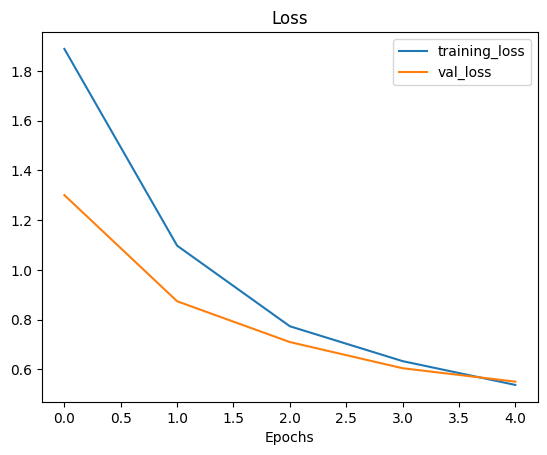

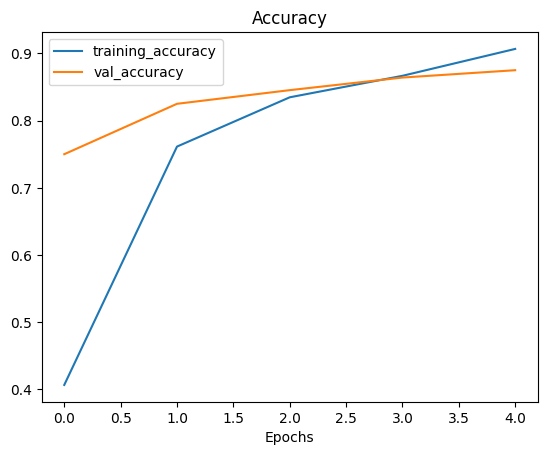

In [ ]:
plot_loss_curves(history_0)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2024-07-29 16:40:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   277MB/s    in 0.5s    

2024-07-29 16:40:09 (277 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [ ]:
unzip_data("/content/10_food_classes_1_percent.zip")

In [ ]:
train_dir = "/content/10_food_classes_1_percent/train"
test_dir = "/content/10_food_classes_1_percent/test"

In [ ]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                                   image_size = IMG_SIZE,
                                                                   batch_size = BATCH_SIZE,
                                                                   label_mode = 'categorical')

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                   image_size = IMG_SIZE,
                                                                   batch_size = BATCH_SIZE,
                                                                   label_mode = 'categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False
inputs = tf.keras.layers.Input(shape = (224,224,3),name = "input_layer")
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global")(x)
output = tf.keras.layers.Dense(10,activation = "softmax", name = "output_layer")(x)

model_1 = tf.keras.Model(inputs,output)

In [ ]:
model_1.compile(loss= "categorical_crossentropy",
                metrics = ["accuracy"],
                optimizer = "adam")

history_1 = model_1.fit(train_data_1_percent,
                        batch_size = BATCH_SIZE,
                        epochs = 5,
                        steps_per_epoch = len(train_data_1_percent),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
3/3 [==============================] - 14s 3s/step - loss: 2.3799 - accuracy: 0.1571 - val_loss: 2.2291 - val_accuracy: 0.1888
Epoch 2/5
3/3 [==============================] - 6s 3s/step - loss: 2.0651 - accuracy: 0.4000 - val_loss: 2.0720 - val_accuracy: 0.3000
Epoch 3/5
3/3 [==============================] - 6s 3s/step - loss: 1.8250 - accuracy: 0.6143 - val_loss: 1.9355 - val_accuracy: 0.4100
Epoch 4/5
3/3 [==============================] - 5s 3s/step - loss: 1.6011 - accuracy: 0.7857 - val_loss: 1.8168 - val_accuracy: 0.4944
Epoch 5/5
3/3 [==============================] - 11s 5s/step - loss: 1.4146 - accuracy: 0.8000 - val_loss: 1.7104 - val_accuracy: 0.5460


In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 10s 111ms/step - loss: 1.7104 - accuracy: 0.5460


[1.7103800773620605, 0.5460000038146973]

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False
inputs = tf.keras.layers.Input(shape = (224,224,3),name = "input_layer")
x1=tf.keras.layers.RandomFlip("horizontal_and_vertical")(inputs)
x1=tf.keras.layers.RandomRotation(0.2)(x1)

x1 = base_model(x1)
x1 = tf.keras.layers.GlobalAveragePooling2D(name = "global")(x1)
output1 = tf.keras.layers.Dense(10,activation = "softmax", name = "output_layer")(x1)

model_2 = tf.keras.Model(inputs,output1)

In [ ]:
model_1.compile(loss= "categorical_crossentropy",
                metrics = ["accuracy"],
                optimizer = "adam")

history_1 = model_1.fit(train_data_1_percent,
                        batch_size = BATCH_SIZE,
                        epochs = 5,
                        steps_per_epoch = len(train_data_1_percent),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
3/3 [==============================] - 24s 6s/step - loss: 1.2420 - accuracy: 0.9286 - val_loss: 1.5871 - val_accuracy: 0.5916
Epoch 2/5
3/3 [==============================] - 6s 3s/step - loss: 1.0505 - accuracy: 0.9286 - val_loss: 1.4922 - val_accuracy: 0.6168
Epoch 3/5
3/3 [==============================] - 9s 4s/step - loss: 0.9029 - accuracy: 0.9857 - val_loss: 1.4100 - val_accuracy: 0.6428
Epoch 4/5
3/3 [==============================] - 5s 3s/step - loss: 0.7797 - accuracy: 0.9714 - val_loss: 1.3379 - val_accuracy: 0.6600
Epoch 5/5
3/3 [==============================] - 6s 3s/step - loss: 0.6837 - accuracy: 0.9857 - val_loss: 1.2753 - val_accuracy: 0.6720


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
],name = "data_augmentation")

/content/10_food_classes_1_percent/train/hamburger/3643495.jpg


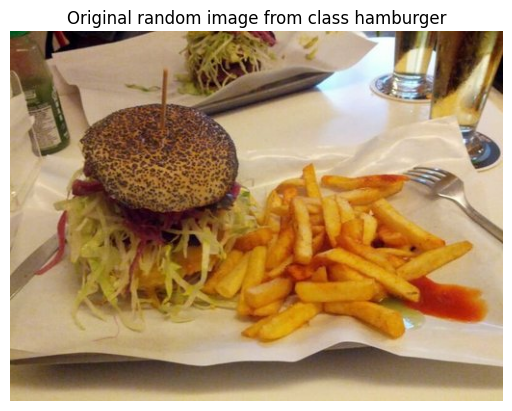

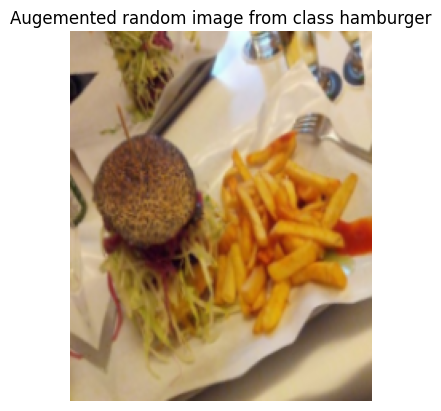

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "/content/10_food_classes_1_percent/train/"  + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
print(random_image_path)

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.axis(False)
plt.title(f"Original random image from class {target_class}")

img = tf.image.resize(img, size = (224,224))
augmented_img = tf.squeeze(data_augmentation(tf.expand_dims(img, axis = 0)))
plt.figure()
plt.title(f"Augemented random image from class {target_class}")
plt.axis("off")
plt.imshow(augmented_img/255.)

In [ ]:
input_shape = (224,224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = input_shape, name = "input_layer")

x = data_augmentation(inputs)

x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D(name = "globaal_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(10,activation = 'softmax', name = 'output_layer')(x)

model_1 = tf.keras.Model(inputs,outputs)

model_1.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)
history_1_percent = model_1.fit(train_data_1_percent,
                                epochs = 5,
                                steps_per_epoch = len(train_data_1_percent),
                                validation_data = test_data,
                                validation_steps = int(0.25*len(test_data)))

Epoch 1/5
3/3 [==============================] - 17s 2s/step - loss: 2.4623 - accuracy: 0.1000 - val_loss: 2.3280 - val_accuracy: 0.1497
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.1601 - accuracy: 0.1857 - val_loss: 2.1820 - val_accuracy: 0.2451
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9793 - accuracy: 0.3286 - val_loss: 2.0499 - val_accuracy: 0.3141
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7842 - accuracy: 0.5286 - val_loss: 1.9467 - val_accuracy: 0.4046
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6568 - accuracy: 0.6000 - val_loss: 1.8634 - val_accuracy: 0.4671


In [ ]:
results_1_percent_data_aug = model_1.evaluate(test_data)

79/79 [==============================] - 9s 104ms/step - loss: 1.8483 - accuracy: 0.4588


In [ ]:
model_1.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 globaal_average_pooling_la  (None, 1280)              0         
 yer (GlobalAveragePooling2                                      
 D)                                                              
                                                                 
 output_layer (Dense)        (None, 10)                128

In [ ]:
train_dir_10_percent = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = "categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = "categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
checkpoint_path = "10_percent_model_checkpoints_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = True,
                                                         save_freq = 'epoch',
                                                         verbose = 1)

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = input_shape, name = "input_layer")

x = data_augmentation(inputs)

x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(10,activation = 'softmax', name = 'output_layer')(x)

model_2 = tf.keras.Model(inputs,outputs)

model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)
initial_epochs = 5
history_10_percent = model_2.fit(train_data_10_percent,
                                epochs =initial_epochs ,
                                steps_per_epoch = len(train_data_10_percent),
                                validation_data = test_data,
                                validation_steps = int(0.25*len(test_data)),
                                callbacks = [checkpoint_callback]

                                 )

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9065 - accuracy: 0.3787
Epoch 1: val_loss improved from 1.80292 to 1.32928, saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 24s 677ms/step - loss: 1.9065 - accuracy: 0.3787 - val_loss: 1.3293 - val_accuracy: 0.7286
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2506 - accuracy: 0.7147
Epoch 2: val_loss improved from 1.32928 to 0.92597, saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 12s 462ms/step - loss: 1.2506 - accuracy: 0.7147 - val_loss: 0.9260 - val_accuracy: 0.8141
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9793 - accuracy: 0.7480
Epoch 3: val_loss improved from 0.92597 to 0.75665, saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 12s 482ms/step - loss: 0.9793 - accuracy: 0.7480 - va

In [ ]:
-*model_2.load_weights(checkpoint_path)

In [ ]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 9s 97ms/step - loss: 1.8328 - accuracy: 0.4232


In [ ]:
for layer in model_2.layers:
  print(layer,layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7e1620187190> True
<keras.src.engine.sequential.Sequential object at 0x7e162051cb20> True
<keras.src.engine.functional.Functional object at 0x7e16c03fb7f0> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7e17445837f0> True
<keras.src.layers.core.dense.Dense object at 0x7e16c03f8fa0> True


In [ ]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_14 False
1 rescaling_22 False
2 normalization_11 False
3 rescaling_23 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze 

In [ ]:
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:

for layer in base_model.layers[-10:]:
  layer.trainable = True

In [ ]:

model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ["accuracy"]
)

In [ ]:
for layer_number,layer in enumerate(model_2.layers[2].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_14 False
1 rescaling_22 False
2 normalization_11 False
3 rescaling_23 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze 

In [ ]:
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_percent_aug = model_2.fit(train_data_10_percent,
                                          epochs = fine_tune_epochs,
                                          validation_data = test_data,
                                          validation_steps = int(0.25*len(test_data)),
                                          initial_epoch = history_10_percent.epoch[-1]

                                          )

Epoch 5/10
24/24 [==============================] - 26s 790ms/step - loss: 1.8530 - accuracy: 0.4253 - val_loss: 1.7245 - val_accuracy: 0.5082
Epoch 6/10
24/24 [==============================] - 18s 719ms/step - loss: 1.7652 - accuracy: 0.5000 - val_loss: 1.6402 - val_accuracy: 0.5921
Epoch 7/10
24/24 [==============================] - 15s 626ms/step - loss: 1.6960 - accuracy: 0.5507 - val_loss: 1.5566 - val_accuracy: 0.6299
Epoch 8/10
24/24 [==============================] - 16s 565ms/step - loss: 1.6050 - accuracy: 0.6373 - val_loss: 1.4984 - val_accuracy: 0.6776
Epoch 9/10
24/24 [==============================] - 14s 553ms/step - loss: 1.5373 - accuracy: 0.6453 - val_loss: 1.4206 - val_accuracy: 0.6974
Epoch 10/10
24/24 [==============================] - 14s 587ms/step - loss: 1.4981 - accuracy: 0.6627 - val_loss: 1.3721 - val_accuracy: 0.7155
